In [ ]:
import numpy as np

class SimplePerceptron:
    def __init__(self, lr=0.05, epochs=30):
        self.lr = lr
        self.epochs = epochs
        self.weights = None  # 权重（含偏置）

    def train(self, X, y):
        n_samples, n_features = X.shape
        # 初始化权重（含偏置项，+1）
        self.weights = np.random.randn(n_features + 1) * 0.01  # 小随机数初始化，增加随机性

        for _ in range(self.epochs):
            # 每次迭代随机打乱样本顺序（增加浮动性）
            indices = np.random.permutation(n_samples)
            for idx in indices:
                x_i = X[idx]
                # 拼接偏置项（x0=1）
                x_with_bias = np.insert(x_i, 0, 1)
                # 计算线性输出和预测
                linear_out = np.dot(self.weights, x_with_bias)
                y_pred = 1 if linear_out >= 0 else -1
                # 错误时更新权重
                if y_pred != y[idx]:
                    self.weights += self.lr * y[idx] * x_with_bias

    def predict(self, X):
        X_with_bias = np.insert(X, 0, 1, axis=1)
        linear_out = np.dot(X_with_bias, self.weights)
        return np.where(linear_out >= 0, 1, -1)



np.random.seed(4)  # 不固定随机种子，每次运行数据略有不同


# 类别1：围绕(1,1)分布，标准差较大（容易与另一类重叠）
X1 = np.random.normal(loc=[1, 1], scale=1.0, size=(100, 2))
y1 = np.ones(100)
# 类别-1：围绕(3,3)分布，与类别1距离近，有重叠
X2 = np.random.normal(loc=[4, 4], scale=1.0, size=(100, 2))
y2 = -np.ones(100)
# 合并数据
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

# 训练并测试（多次运行会看到准确率浮动）
perceptron = SimplePerceptron(lr=0.02, epochs=30)
perceptron.train(X, y)
y_pred = perceptron.predict(X)
accuracy = np.mean(y_pred == y) * 100
print(f"本次准确率：{accuracy:.2f}%")

本次准确率：96.00%


任务设计：二维数据的二分类

数据分布：
类别 1（标签 1）：围绕中心点 (1,1) 的正态分布，标准差 1.0（数据更分散）。
类别 2（标签 - 1）：围绕中心点 (3,3) 的正态分布，标准差 1.0（与类别 1 距离近，存在重叠）。
总样本量：200 个（两类各 100 个）。

使用Numpy去数据集的定义

(200, 2)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]


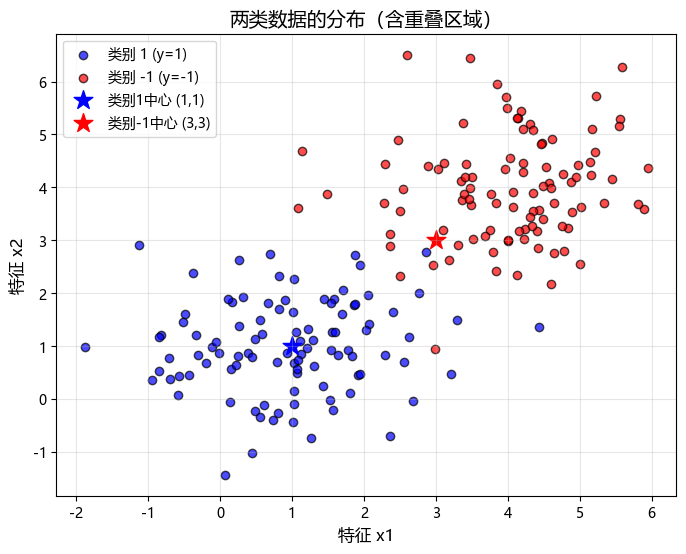

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 指定默认字体为微软雅黑
plt.rcParams['axes.unicode_minus'] = False
# 生成原始数据（复用你的数据生成逻辑）
np.random.seed(40)
X1 = np.random.normal(loc=[1, 1], scale=1.0, size=(100, 2))  # 类别1（标签1）

# print(X1)
y1 = np.ones(100)
# print(y1.ndim)
X2 = np.random.normal(loc=[4, 4], scale=1.0, size=(100, 2))  # 类别-1（标签-1）
y2 = -np.ones(100)
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))
print(X.shape)
print(y)
# 可视化
plt.figure(figsize=(8, 6))  # 设置图大小

# 绘制两类数据的散点图（用不同颜色和标记区分）
plt.scatter(X1[:, 0], X1[:, 1], c='blue', label='类别 1 (y=1)', alpha=0.7, edgecolors='k')  # 类别1：蓝色
plt.scatter(X2[:, 0], X2[:, 1], c='red', label='类别 -1 (y=-1)', alpha=0.7, edgecolors='k')  # 类别-1：红色

# 标注中心点（两类数据的均值）
plt.scatter(1, 1, c='blue', s=200, marker='*', label='类别1中心 (1,1)')  # 类别1中心点
plt.scatter(3, 3, c='red', s=200, marker='*', label='类别-1中心 (3,3)')  # 类别-1中心点

# 添加标签和标题
plt.xlabel('特征 x1', fontsize=12)
plt.ylabel('特征 x2', fontsize=12)
plt.title('两类数据的分布（含重叠区域）', fontsize=14)
plt.legend()  # 显示图例
plt.grid(alpha=0.3)  # 网格线（轻微透明）
plt.show()

我们通过数学建模，可以通过数学公式XW+B也就是一条划分曲线来实现我们的一个样本点分类

#数学意义上的前向传播时可以使用激活函数的数学公式实现

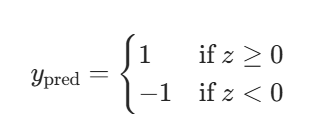

我们定义了一个数学公式，我们如何去更新我们的权重呢？

In [22]:
import numpy as np

# ------------------------------------------------------------------------------
# 第一步：定义固定参数（确保两种计算方式的输入完全一致）
# ------------------------------------------------------------------------------
# 1. 3个2维样本（特征矩阵X：shape=(3, 2)，3个样本，每个样本2个特征）
X = np.array([
    [1.2, 0.8],   # 样本1：x1=1.2, x2=0.8
    [2.1, 1.5],   # 样本2：x1=2.1, x2=1.5
    [0.7, 0.3]    # 样本3：x1=0.7, x2=0.3
])

# 2. 原始特征权重（2维向量：w1=0.5, w2=0.3，对应2个特征）
w = np.array([0.5, 0.3])

# 3. 独立偏置项（标量：b=0.2）
b = 0.2

# ------------------------------------------------------------------------------
# 第二步：用「原始数学公式」计算线性输出 z
# 公式：z = w1*x1 + w2*x2 + b
# ------------------------------------------------------------------------------
# 方法：先算所有样本的特征加权和（X和w的点积），再统一加偏置b
weighted_sum = np.dot(X, w)  # 3个样本的加权和：shape=(3,)，每个元素是w1x1 + w2x2
z_original = weighted_sum + b  # 加偏置项，得到原始公式的输出

print("="*50)
print("原始数学公式计算结果：")
print(f"特征加权和（w1x1 + w2x2）：{weighted_sum.round(4)}")
print(f"加偏置后（z = 加权和 + b）：{z_original.round(4)}")
print("="*50)

原始数学公式计算结果：
特征加权和（w1x1 + w2x2）：[0.84 1.5  0.44]
加偏置后（z = 加权和 + b）：[1.04 1.7  0.64]


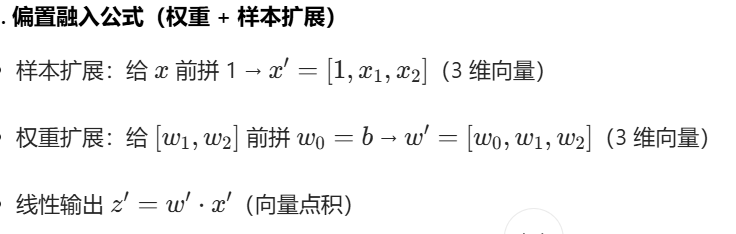

In [8]:
import numpy as np

# --------------------------
# 第一步：设置固定参数（避免随机，方便手动验算）
# --------------------------
# 2维特征样本（单个样本 + 批量样本）
x_single = np.array([2, 3])  # 单个样本：x1=2, x2=3（手动算：2*4 + 3*5 +6= 8+15+6=29）
X_batch = np.array([[2, 3], [1, 4], [5, 2], [3, 1], [4, 6]])  # 5个批量样本（2维）

# 原始参数（特征权重 + 独立偏置）
w = np.array([4, 5])  # 特征权重：w1=4, w2=5
b = 6                 # 独立偏置项：b=6


# --------------------------
# 第二步：用「原始公式」计算线性输出
# --------------------------
# 1. 单个样本的原始计算（对应公式：z = w1x1 + w2x2 + b）
z_original_single = np.dot(w, x_single) + b  # 点积(w·x) + 偏置b

# 2. 批量样本的原始计算（每行是一个样本，批量计算）
# np.dot(X_batch, w)：每行样本与w点积，得到(5,)的向量；再 +b（广播到每行）
Z_original_batch = np.dot(X_batch, w) + b

# --------------------------
# 第三步：用「偏置融入公式」计算线性输出
# --------------------------
# 1. 偏置融入处理（样本+1，权重+w0=b）
x_fused_single = np.insert(x_single, 0, 1)  # 单个样本扩展：[2,3] → [1,2,3]

w_fused = np.insert(w, 0, b)               # 权重扩展：[4,5] → [6,4,5]（w0=b=6）

# 批量样本扩展：给每行前插1（(5,2) → (5,3)）
X_fused_batch = np.insert(X_batch, 0, 1, axis=1)  # axis=1表示按列插入（每行都加1）

# 2. 融入公式计算（点积）
z_fused_single = np.dot(w_fused, x_fused_single)  # 单个样本点积（3维向量点积）
Z_fused_batch = np.dot(X_fused_batch, w_fused)    # 批量样本点积（(5,3) × (3,) → (5,)）

# --------------------------
# 第四步：验证两种公式结果是否相等
# --------------------------
print("="*50)
print("单个样本验证：")
print(f"原始公式输出 z = {z_original_single}")
print(f"融入公式输出 z' = {z_fused_single}")
print(f"结果是否相等？{np.allclose(z_original_single, z_fused_single)}")  # 浮点误差容忍

print("\n" + "="*50)
print("批量样本验证（5个2维样本）：")
print(f"原始公式批量输出 Z = {Z_original_batch}")
print(f"融入公式批量输出 Z' = {Z_fused_batch}")
print(f"所有样本结果是否都相等？{np.allclose(Z_original_batch, Z_fused_batch)}")

单个样本验证：
原始公式输出 z = 29
融入公式输出 z' = 29
结果是否相等？True

批量样本验证（5个2维样本）：
原始公式批量输出 Z = [29 30 36 23 52]
融入公式批量输出 Z' = [29 30 36 23 52]
所有样本结果是否都相等？True


训练好的数学公式如何进行预测

核心原则：预测时的计算逻辑必须和训练时完全一致—— 否则训练好的权重 “认不出” 输入，预测结果必然错误。
例子：
若 linear_out = [1.04, -0.5, 2.3, -1.1, ...]（共 200 个元素），则返回的标签是 [1, -1, 1, -1, ...]。

后续的一个课程安排：大家学习动手去实现将我们的该代码以及我们昨天讲到鳄鱼与蛇的分类模型的权重参数保存下来，并且可以实现以下几点核心
包含「模型权重保存→权重加载→新样本预测」